In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
control_data = pd.read_csv("control.csv")
control_data.head()

,t,x,v
0,0.000000,-6.798380e-13,-1.046660e-06
1,0.000001,-7.465420e-12,-9.417260e-06
2,0.000002,-9.599310e-12,5.978490e-06
3,0.000003,-5.448010e-12,5.101540e-07
4,0.000004,-2.341090e-12,4.281470e-06


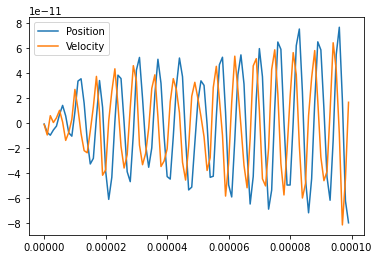

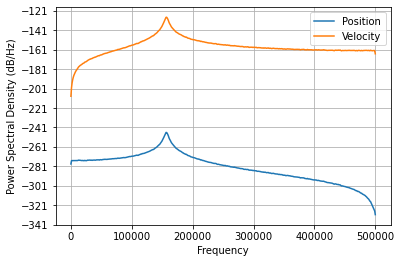

In [3]:
plt.plot(control_data.t[:100], control_data.x[:100], label="Position")
plt.plot(control_data.t[:100], 0.000001*control_data.v[:100], label="Velocity")
plt.legend()
plt.show()
plt.psd(control_data.x, Fs=1e6, NFFT=2**10, label="Position")
plt.psd(control_data.v, Fs=1e6, NFFT=2**10, label="Velocity")
plt.legend()
plt.show()

In [4]:
def data_stats(df, title, N=100):
	average_pos = np.mean(df.x)
	average_vel = np.mean(df.v)
	pos_var = np.std(df.x)
	vel_var = np.std(df.v)

	fig, axs = plt.subplots(1, 2, figsize=(18,9))
	fig.suptitle(title)
	axs[0].plot(df.t[:N], df.x[:N]/pos_var, label="Position")
	axs[0].plot(df.t[:N], df.v[:N]/vel_var, label="Velocity")
	axs[0].legend(loc="upper right")
	axs[0].set_ylabel("Position/Velocity [a.u.]")
	axs[0].set_xlabel("Time [s]")

	axs[1].psd(df.x, label="Position", Fs=1e6, NFFT=2**12)
	axs[1].psd(df.v, label="Velocity", Fs=1e6, NFFT=2**12)
	axs[1].legend(loc="upper right")
	axs[1].set_xlabel("Frequency [kHz]")

	plt.show()

	print("Results of experiment : ")
	print(f"Average position : {average_pos*1e9} nm")
	print(f"Stdev of position : {pos_var*1e9} nm")


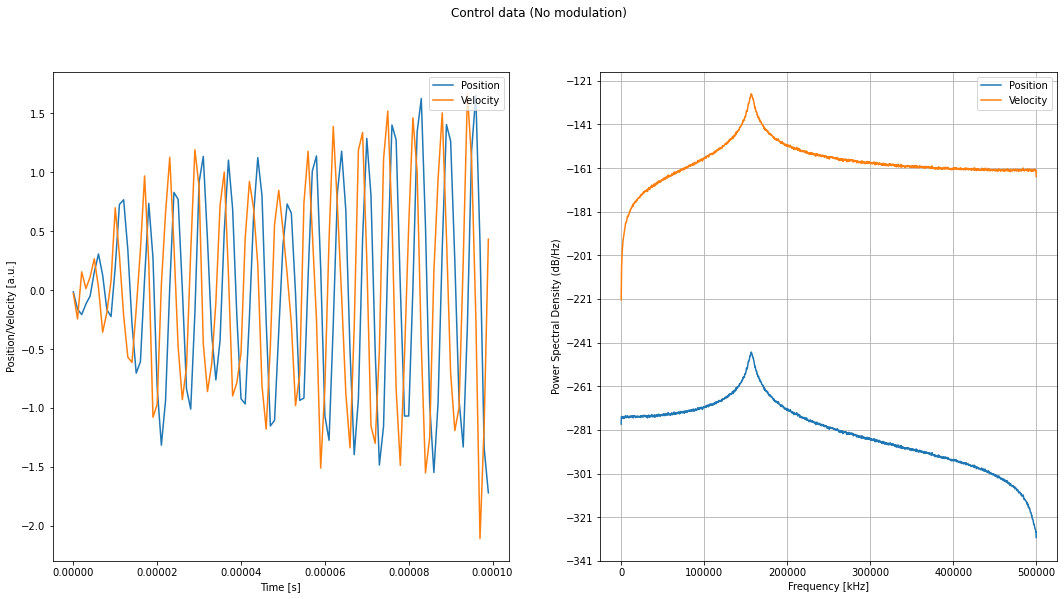

Results of experiment : 
Average position : 5.052114390160144e-06 nm
Stdev of position : 0.046276008042162746 nm


In [5]:
data_stats(control_data, "Control data (No modulation)")

In [6]:
fixed_qE_data = pd.read_csv("fixed-qE.csv")
fixed_qE_data.head()

,t,x,v
0,0.000000,-2.628640e-10,-0.000405
1,0.000001,-8.124610e-10,-0.000448
2,0.000002,-1.150730e-09,-0.000080
3,0.000003,-9.865730e-10,0.000331
4,0.000004,-4.843370e-10,0.000447


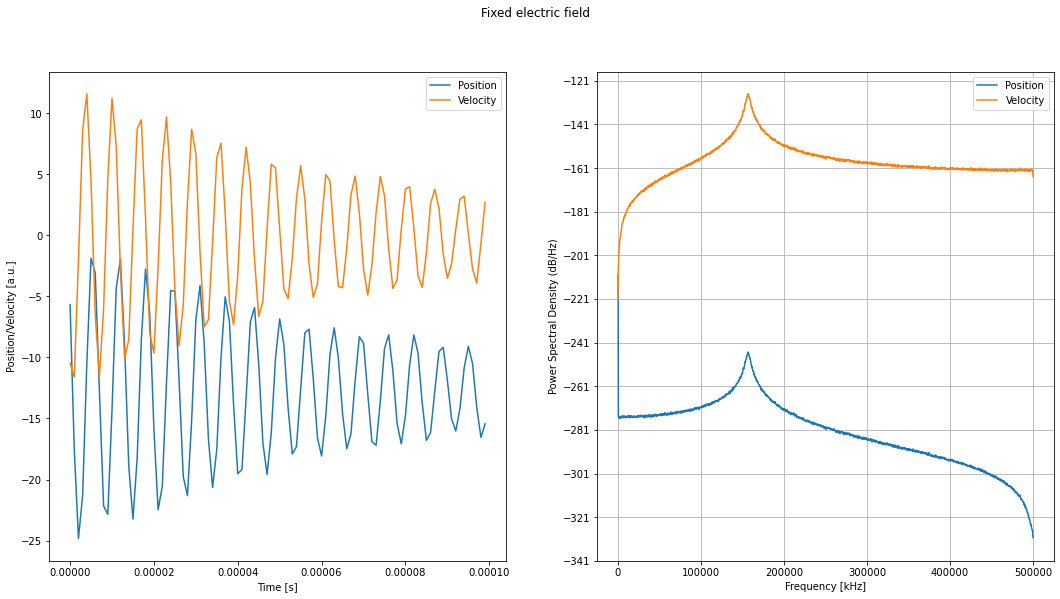

Results of experiment : 
Average position : -0.5903251360813639 nm
Stdev of position : 0.04634102502773773 nm


In [7]:
data_stats(fixed_qE_data, "Fixed electric field")

In [8]:
sine_qE_data = pd.read_csv("sine-qE.csv")
sine_qE_data.head()

,t,x,v
0,0.000000,-6.798380e-13,-0.000001
1,0.000001,-2.288350e-10,-0.000350
2,0.000002,-7.051410e-10,-0.000389
3,0.000003,-8.132640e-10,0.000216
4,0.000004,-3.740340e-11,0.000982


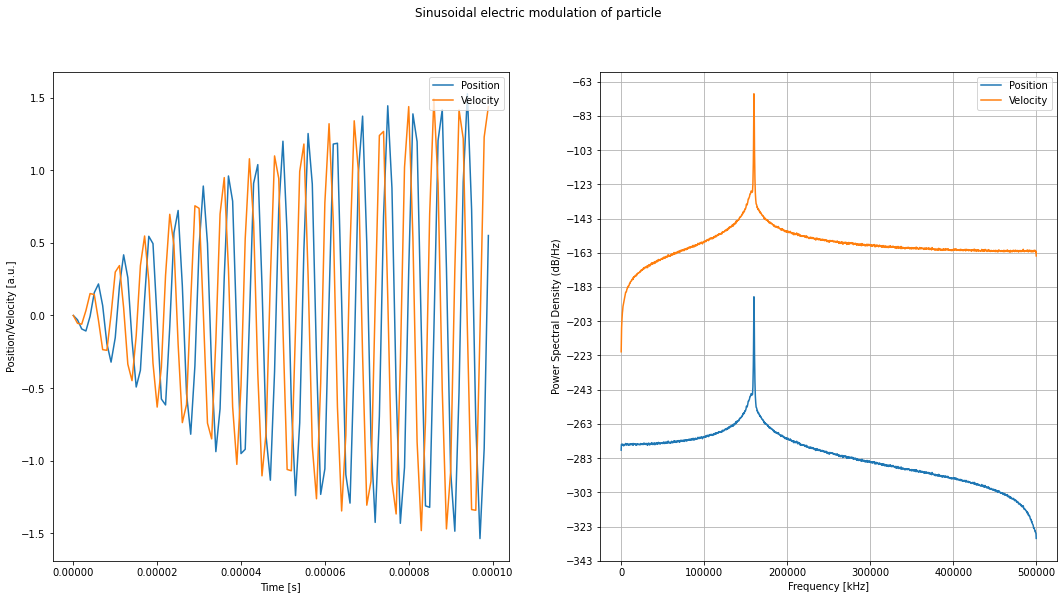

Results of experiment : 
Average position : 1.2799508219001333e-06 nm
Stdev of position : 7.618295693091241 nm


In [9]:
data_stats(sine_qE_data, "Sinusoidal electric modulation of particle")

In [10]:
lfc_data = pd.read_csv("lfc-attempt.csv")
lfc_data.head()

,t,x,v
0,0.000000,-6.798380e-13,-1.046660e-06
1,0.000001,-7.465150e-12,-9.416840e-06
2,0.000002,-9.596270e-12,5.982330e-06
3,0.000003,-5.444120e-12,5.076990e-07
4,0.000004,-2.341480e-12,4.277300e-06


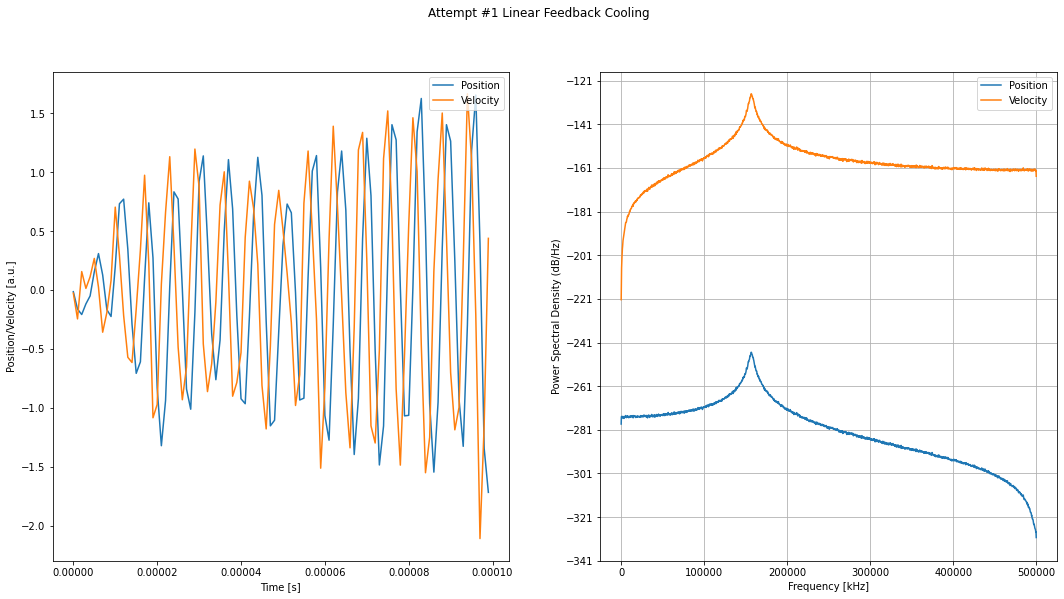

Results of experiment : 
Average position : 5.051620263427869e-06 nm
Stdev of position : 0.04598920977740702 nm


In [11]:
data_stats(lfc_data, "Attempt #1 Linear Feedback Cooling", N=100)

Okay, so now we are going to try doing the exact same thing but flipping the polarity of the electric field and see if there's any discernible difference.

In [12]:
lfc_data_2 = pd.read_csv("lfc-attempt-2.csv")
lfc_data_2.head()

,t,x,v
0,0.000000,-6.798380e-13,-1.046660e-06
1,0.000001,-7.465690e-12,-9.417690e-06
2,0.000002,-9.602340e-12,5.974660e-06
3,0.000003,-5.451910e-12,5.126030e-07
4,0.000004,-2.340720e-12,4.285650e-06


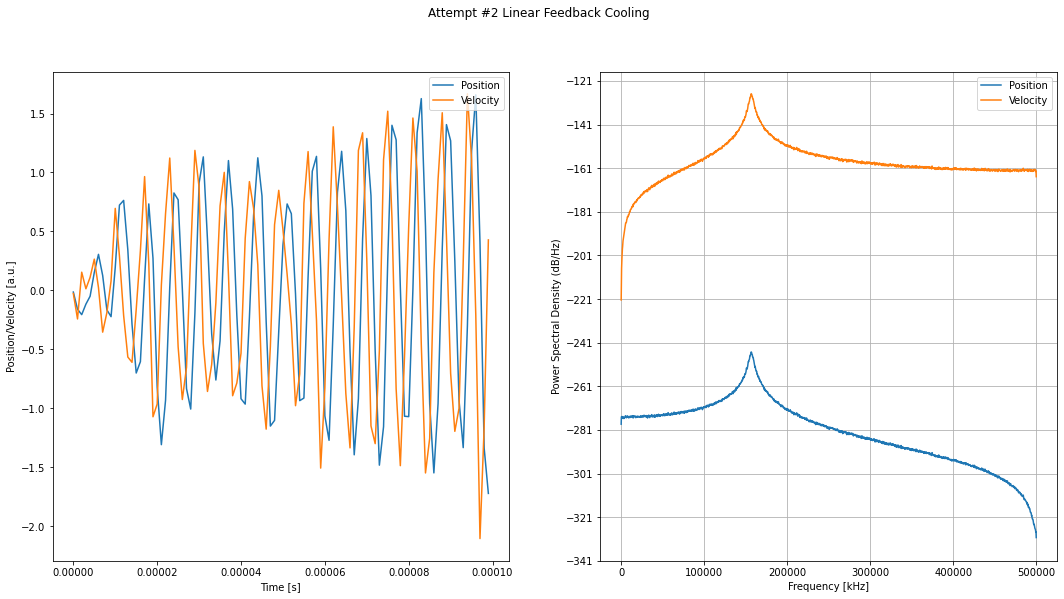

Results of experiment : 
Average position : 5.0525951448719974e-06 nm
Stdev of position : 0.04656825280340738 nm


In [13]:
data_stats(lfc_data_2, "Attempt #2 Linear Feedback Cooling")

Okay, so we don't see any changes there either. What could be the case?

We can already see that our experimental electric fields are a lot weaker than what we see here. So what can we change?

Measurement noise is not even included, so it cannot be that either. Maybe 1 second is not fast enough for us to see results? Could that be it?

- The intensity of the electric field - make it way stronger just so we see something
- Total simulation time needs to be much longer.

So let's do these things back to back.

We first did it with E = 1000, now let's go E = 5000

In [14]:
lfc_data_3 = pd.read_csv("lfc-attempt-3.csv")
lfc_data_3.head()

,t,x,v
0,0.000000,-6.798380e-13,-1.046660e-06
1,0.000001,-7.464050e-12,-9.415150e-06
2,0.000002,-9.584120e-12,5.997680e-06
3,0.000003,-5.428560e-12,4.978490e-07
4,0.000004,-2.343040e-12,4.260640e-06


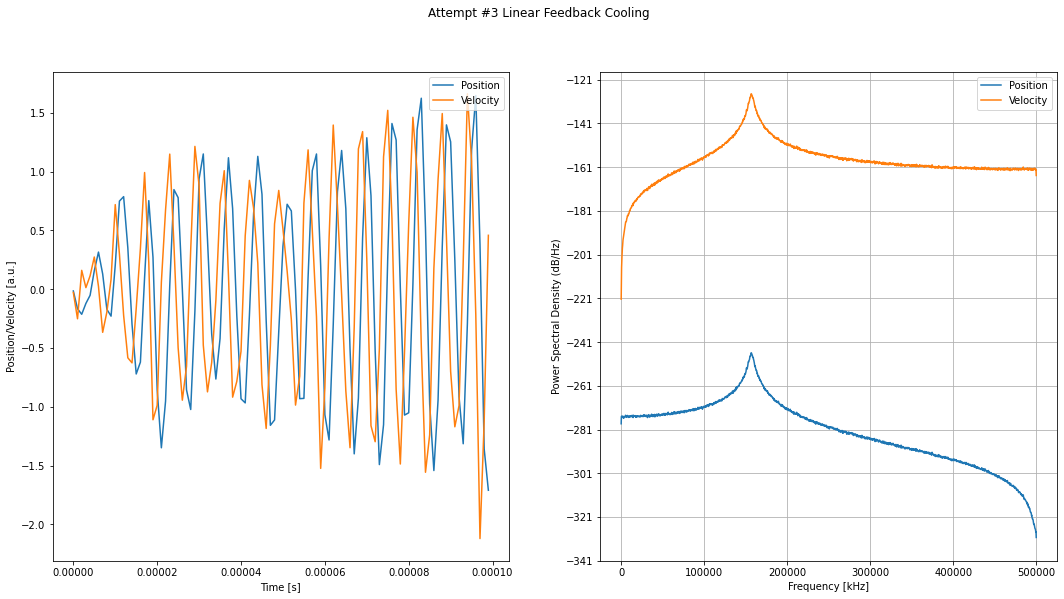

Results of experiment : 
Average position : 5.049902567950977e-06 nm
Stdev of position : 0.044893238054847434 nm


In [15]:
data_stats(lfc_data_3, "Attempt #3 Linear Feedback Cooling")

In [16]:
# hohoho, so this looks mildly smaller. that's interesting. v interesting. let's try going all out then.

# E = 10000 V/m

lfc_data_4 = pd.read_csv("lfc-attempt-4.csv")
lfc_data_4.head()

,t,x,v
0,0.000000,-6.798380e-13,-1.046660e-06
1,0.000001,-7.462680e-12,-9.413040e-06
2,0.000002,-9.568950e-12,6.016860e-06
3,0.000003,-5.409170e-12,4.854680e-07
4,0.000004,-2.345060e-12,4.239850e-06


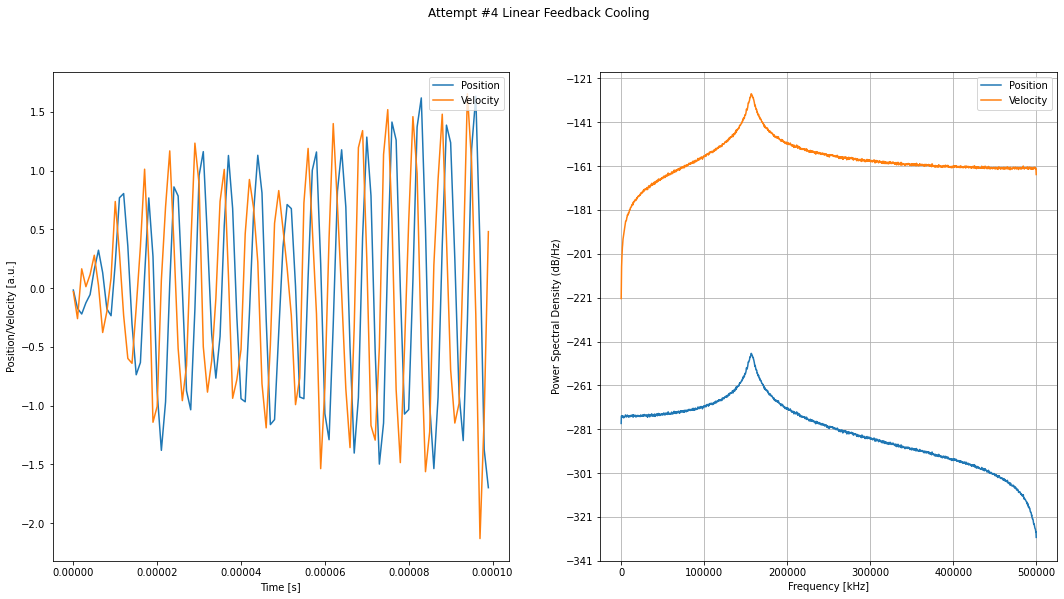

Results of experiment : 
Average position : 5.047891576541389e-06 nm
Stdev of position : 0.04362769682312844 nm


In [17]:
data_stats(lfc_data_4, "Attempt #4 Linear Feedback Cooling")

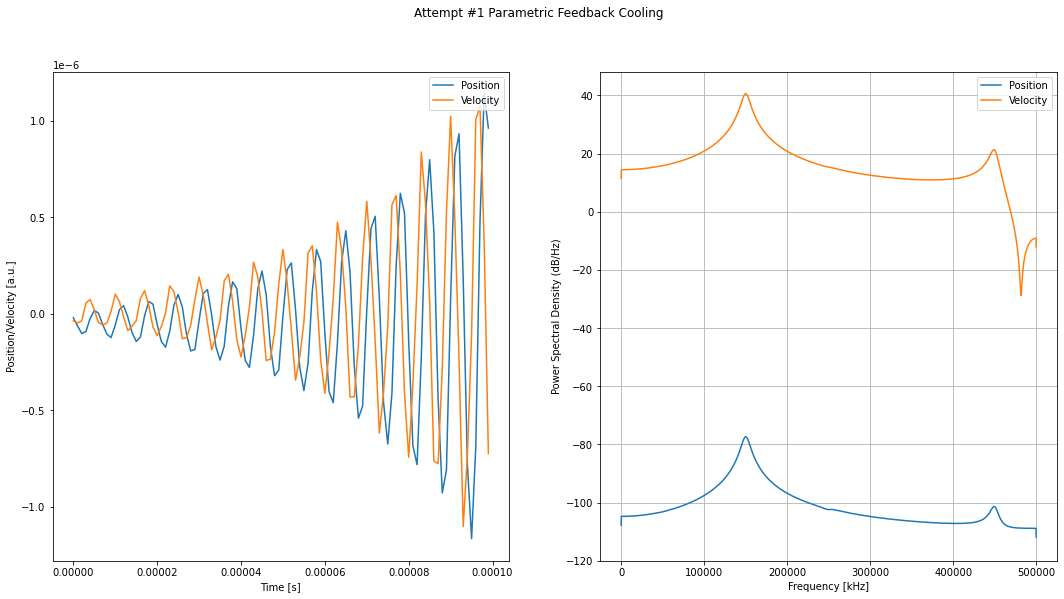

Results of experiment : 
Average position : 1095802.595112326 nm
Stdev of position : 122376263.8859332 nm


In [18]:
# OKAY, so I'm going to die. The standard deviation appears to be decreasing, but the peak doesn't seem to be moving all that much.

pfc_data = pd.read_csv("pfc-attempt.csv")

data_stats(pfc_data, "Attempt #1 Parametric Feedback Cooling")

# particle got lost at 0.0012 seconds, it appears to be some kind of amplitude build-up. Might be because of the modulation depth. 

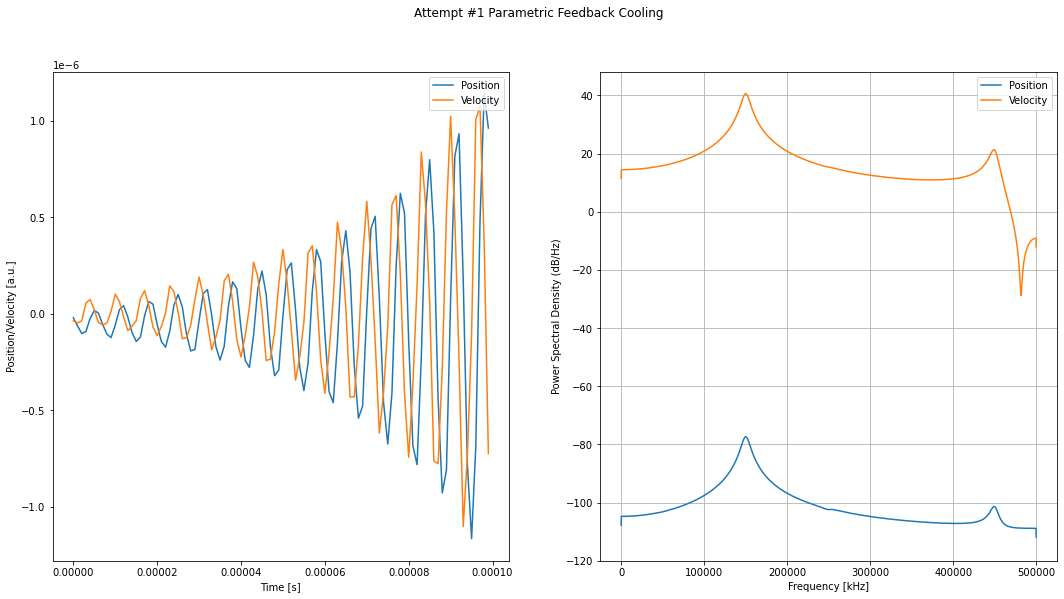

Results of experiment : 
Average position : 1095802.595112326 nm
Stdev of position : 122376263.8859332 nm


In [19]:
pfc_data = pd.read_csv("pfc-attempt.csv")

data_stats(pfc_data, "Attempt #1 Parametric Feedback Cooling")

# this looks very parametric resonance, actually, the amplitude appears to be increasing exponentially

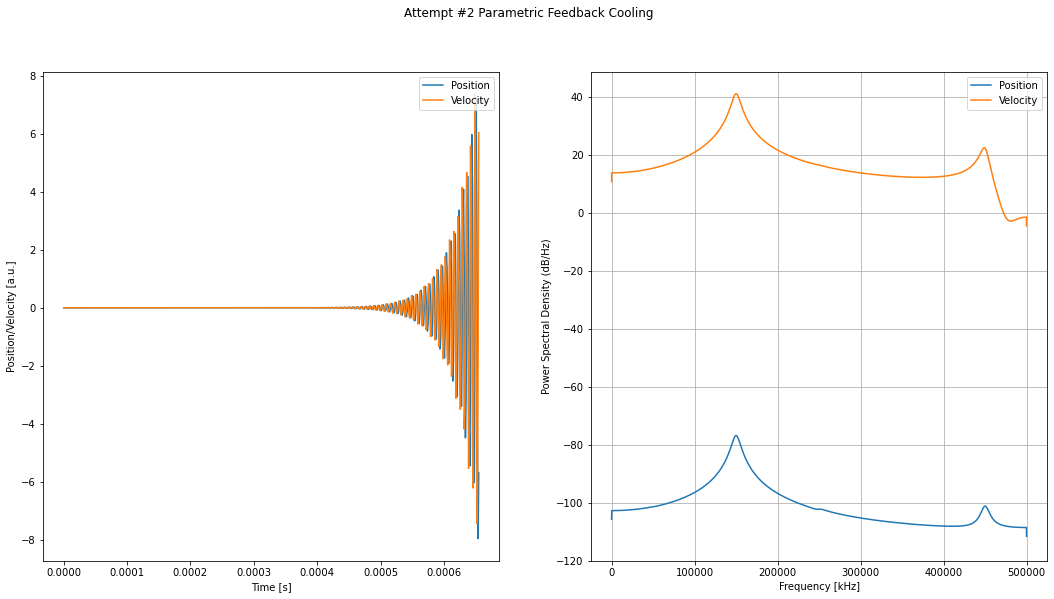

Results of experiment : 
Average position : -1330858.4695978083 nm
Stdev of position : 125553365.2702294 nm


In [20]:
pfc_data_2 = pd.read_csv("pfc-attempt-2.csv")

data_stats(pfc_data_2, "Attempt #2 Parametric Feedback Cooling", N=-1)

# so this is with the pi/2 phase delay.

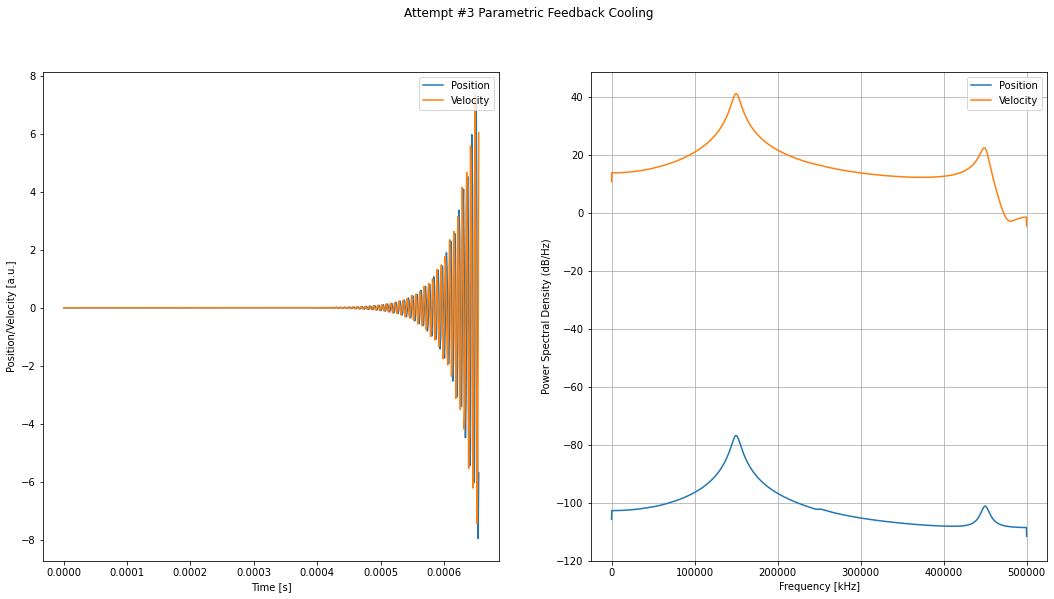

Results of experiment : 
Average position : -1330858.4695978083 nm
Stdev of position : 125553365.2702294 nm


In [21]:
# reduced modulation depth

pfc_data_3 = pd.read_csv("pfc-attempt-3.csv")

data_stats(pfc_data_2, "Attempt #3 Parametric Feedback Cooling", N=-1)

# so this is with the pi/2 phase delay.



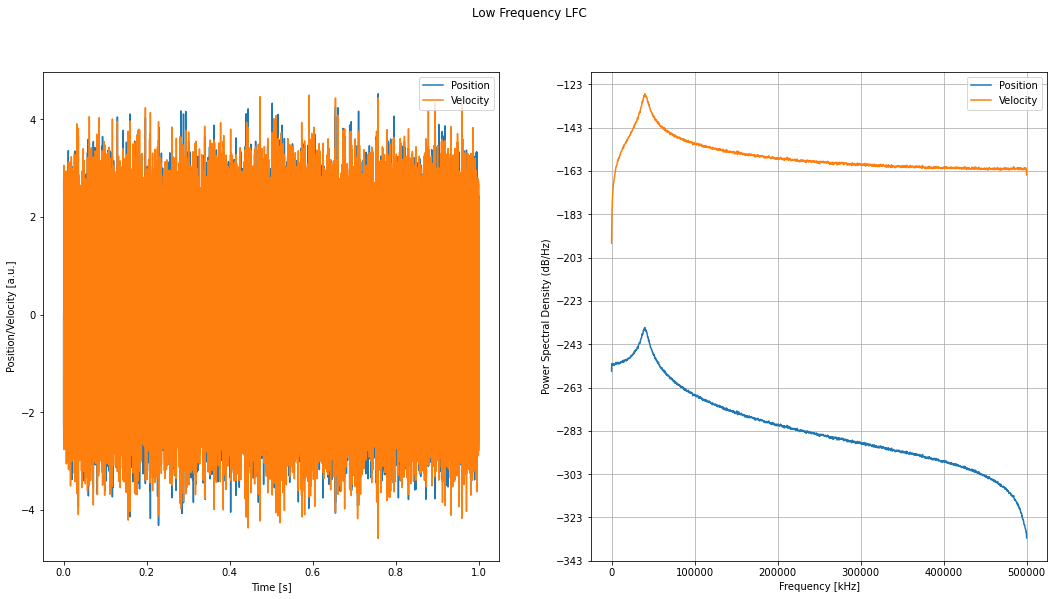

Results of experiment : 
Average position : 7.018432503089366e-05 nm
Stdev of position : 0.16113920023627837 nm


In [23]:
# reduced modulation depth

lfc_data_lof = pd.read_csv("lfc-attempt-lof-1.csv")

data_stats(lfc_data_lof, "Low Frequency LFC", N=-1)

# so this is with the pi/2 phase delay.



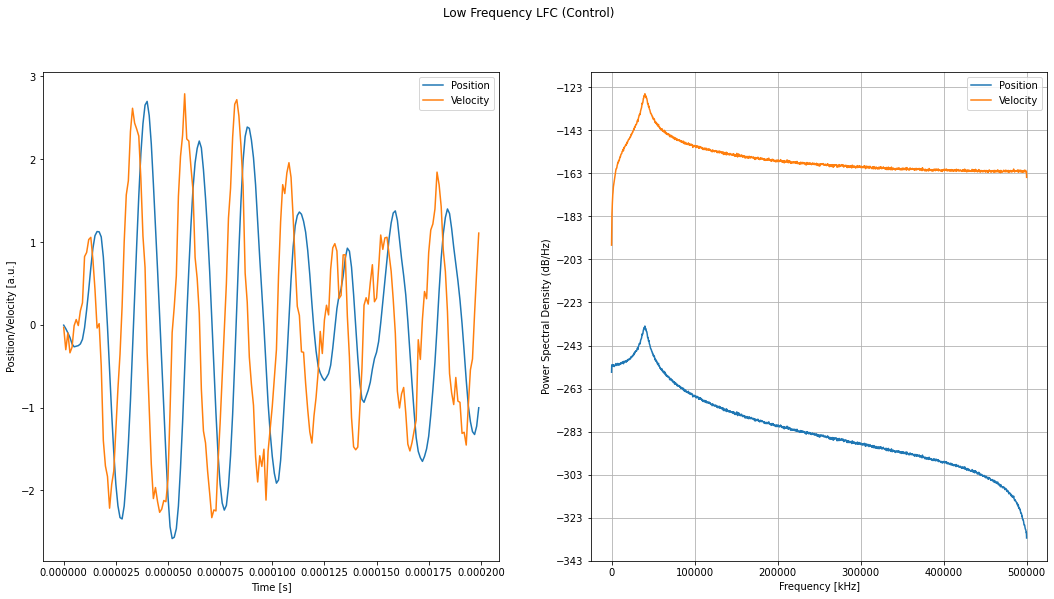

Results of experiment : 
Average position : 7.012508261083167e-05 nm
Stdev of position : 0.17335978381714423 nm


In [30]:
# reduced modulation depth

lfc_data_lof_0 = pd.read_csv("lfc-attempt-lof-0.csv")

data_stats(lfc_data_lof_0, "Low Frequency LFC (Control)", N=200)

# so this is with the pi/2 phase delay.



In [31]:
# the amplitude appears to have changed by a factor of 0.01nm, which is a strange quantity